In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
import pickle


## IMPORT DATA

In [2]:
# Data from: https://www.kaggle.com/datasets/camnugent/california-housing-prices
df =  pd.read_csv('housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

## EDA

In [3]:
# check data type and null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Check if there is any missing value
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# Check if there is any value that is 0
df.isin([0]).sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
# Check if there is any blank in 'ocean_proximity' that is labelled other than null
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

/Users/reginasoh/.pyenv/versions/iod_proj_2/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


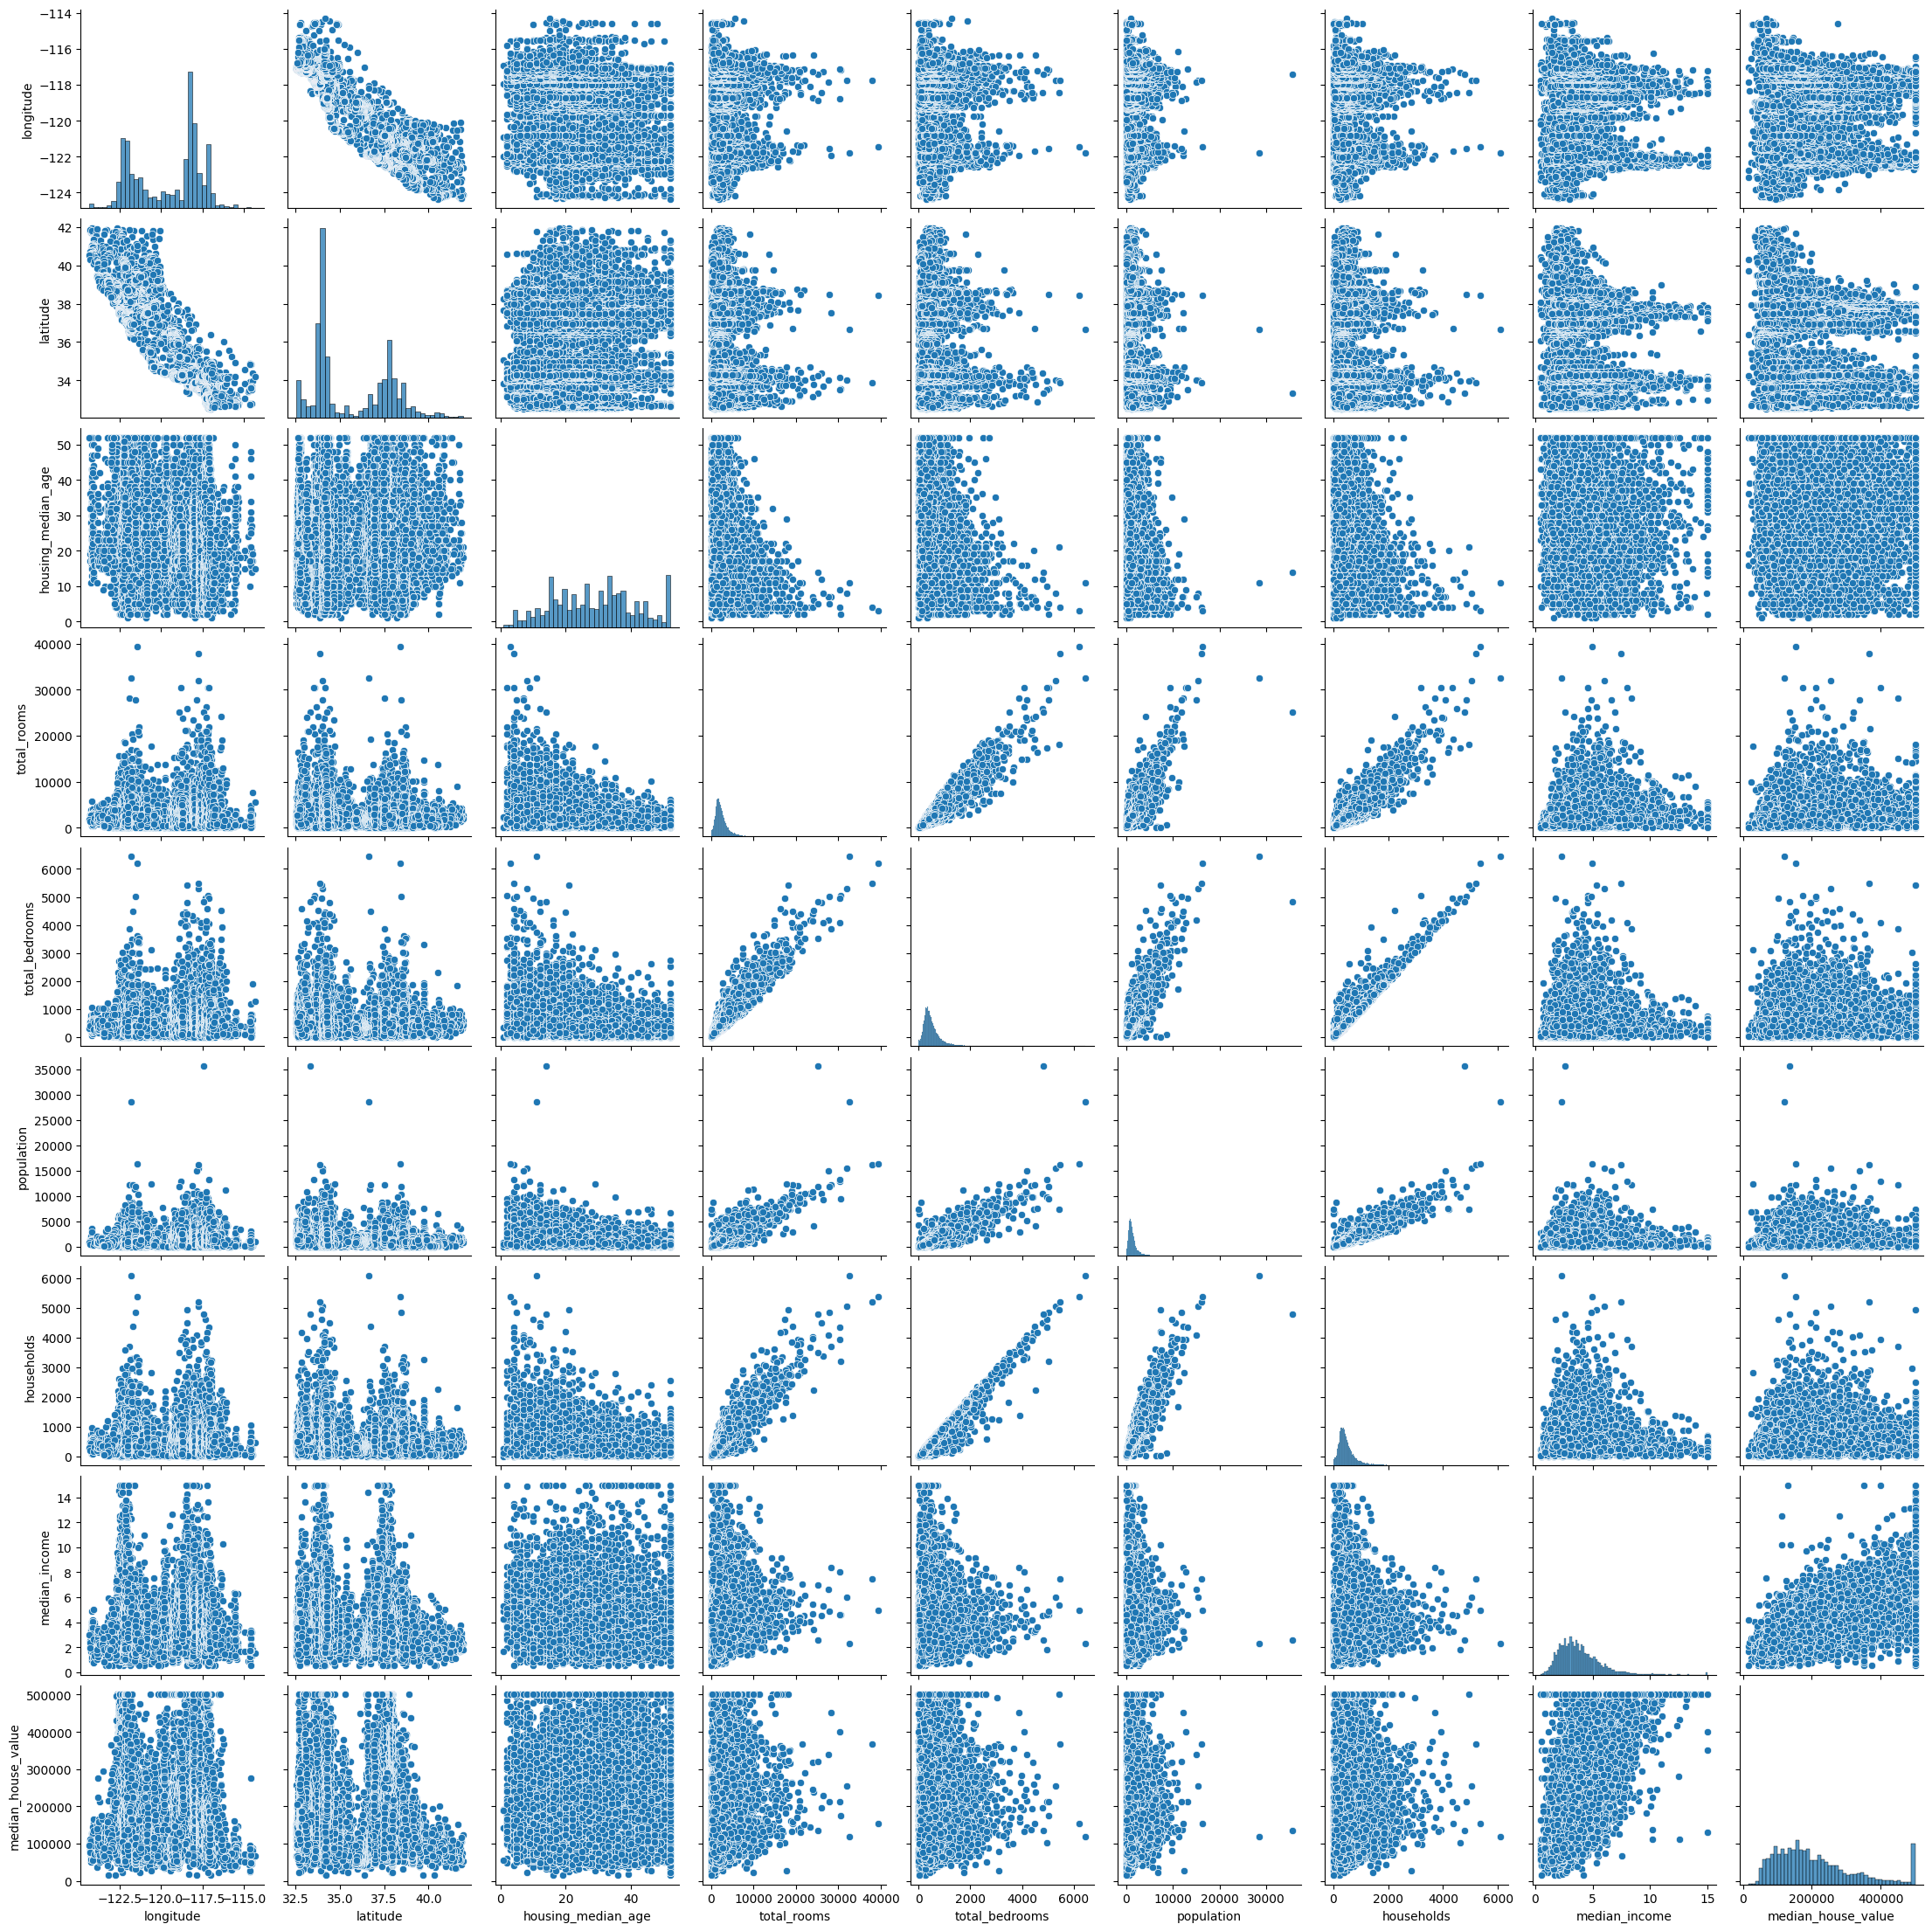

In [7]:
# Check relationships
sns.pairplot(df)

In [8]:
df_corr_raw = abs(df.select_dtypes(exclude='object').corr())
corr_raw = df_corr_raw.unstack()
corr_raw['median_house_value'].sort_values()

population            0.024650
longitude             0.045967
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
latitude              0.144160
median_income         0.688075
median_house_value    1.000000
dtype: float64

In [9]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [10]:
max(df['median_house_value'])

500001.0

/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/3540789005.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/3540789005.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


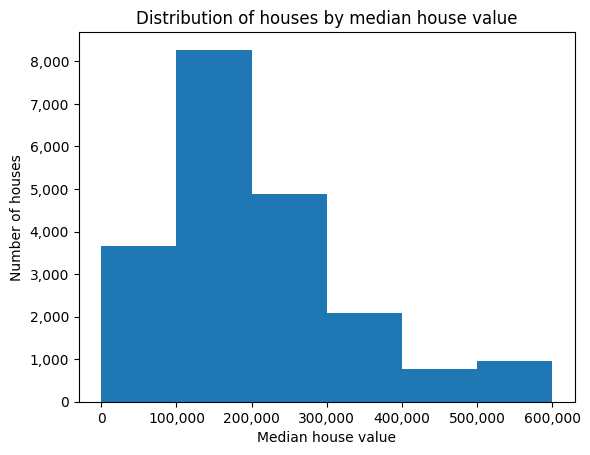

In [11]:
bins = [0, 100000, 200000, 300000, 400000,500000, 600000]
labels = [0, 100000, 200000, 300000,400000,500000]
median_house_value_gp = pd.cut(df['median_house_value'], bins, labels = labels,include_lowest = True)

# median house value distribution
plt.hist(median_house_value_gp, bins=bins) 
plt.title("Distribution of houses by median house value")
plt.xlabel("Median house value")
plt.ylabel("Number of houses")
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])
plt.show()


In [12]:
median_house_value_gp.value_counts().sort_index()

median_house_value
0         3658
100000    8273
200000    4873
300000    2092
400000     779
500000     965
Name: count, dtype: int64

In [13]:
df[df['median_house_value'] > 500000]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
89       -122.27     37.80                52.0        249.0            78.0   
459      -122.25     37.87                52.0        609.0           236.0   
493      -122.24     37.86                52.0       1668.0           225.0   
494      -122.24     37.85                52.0       3726.0           474.0   
509      -122.23     37.83                52.0       2990.0           379.0   
...          ...       ...                 ...          ...             ...   
20422    -118.90     34.14                35.0       1503.0           263.0   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20436    -118.69     34.21                10.0       3663.0           409.0   
20443    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  median_house_value  \
89          396.0        85.0         1.2434            500001.0   
459        1349.0       250.0         1.1696            500001.0   
493         517.0       214.0         7.8521            500001.0   
494        1366.0       496.0         9.3959            500001.0   
509         947.0       361.0         7.8772            500001.0   
...           ...         ...            ...                 ...   
20422       576.0       216.0         5.1457            500001.0   
20426       415.0       119.0        10.0472            500001.0   
20427      5495.0      2152.0         8.6499            500001.0   
20436      1179.0       371.0        12.5420            500001.0   
20443       130.0        35.0         3.3438            500001.0   

      ocean_proximity  
89           NEAR BAY  
459          NEAR BAY  
493          NEAR BAY  
494          NEAR BAY  
509          NEAR BAY  
...               ...  
20422       <1H OCEAN  
20426       <1H OCEAN  
20427       <1H OCEAN  
20436       <1H OCEAN  
20443       <1H OCEAN  

[965 rows x 10 columns]

In [14]:
df[df['median_house_value'] > 500000]['median_house_value'].value_counts()

median_house_value
500001.0    965
Name: count, dtype: int64

In [15]:
df['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

In [16]:
# Filter out houses with median_house_value of 500001 as the frequency is too high to trust 
df_filtered = df[df['median_house_value'] < 500001]

/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1910951257.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1910951257.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


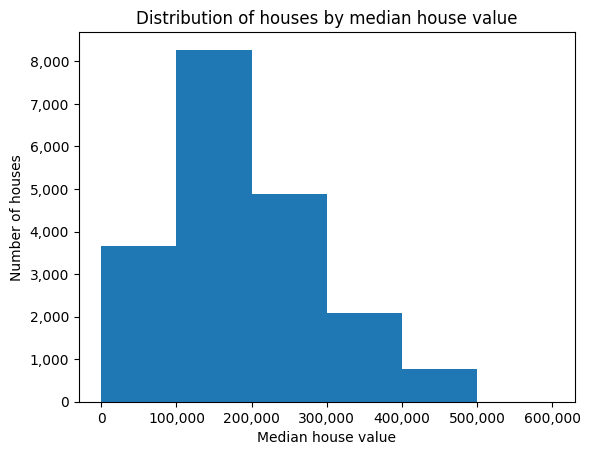

In [17]:
# new median house value distribution

median_house_value_gp_new = pd.cut(df_filtered['median_house_value'], bins, labels = labels,include_lowest = True)


plt.hist(median_house_value_gp_new, bins=bins) 
plt.title("Distribution of houses by median house value")
plt.xlabel("Median house value")
plt.ylabel("Number of houses")

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])
plt.show()

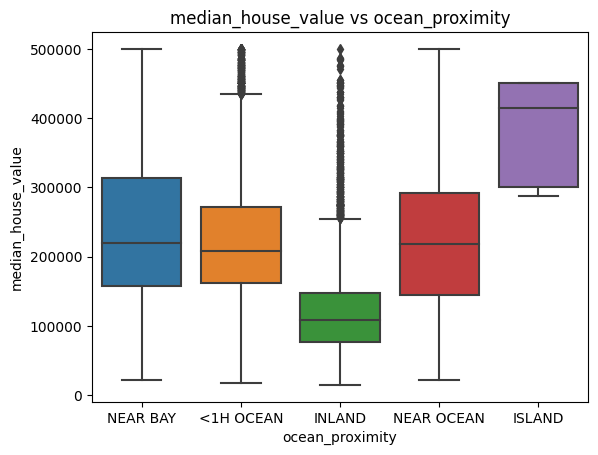

In [18]:
# Compare median house value and ocean proximity 

sns.boxplot(x="ocean_proximity", y="median_house_value", data=df_filtered).set(title='median_house_value vs ocean_proximity') 

plt.show()

<Axes: >

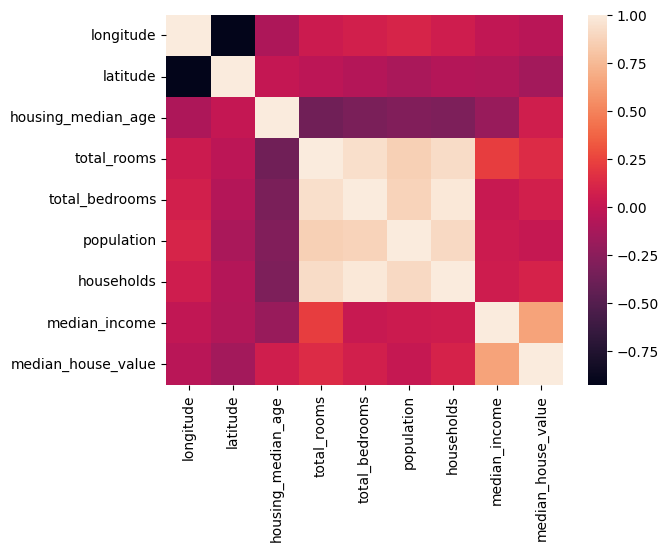

In [19]:
sns.heatmap(df_filtered.select_dtypes(exclude='object').corr())

In [20]:
df_corr = abs(df_filtered.select_dtypes(exclude='object').corr())
corr = df_corr.unstack()
corr['median_house_value'].sort_values()
corr[(corr>0.7) & (corr!=1)]

longitude       latitude          0.924139
latitude        longitude         0.924139
total_rooms     total_bedrooms    0.934147
                population        0.859590
                households        0.921102
total_bedrooms  total_rooms       0.934147
                population        0.879176
                households        0.979144
population      total_rooms       0.859590
                total_bedrooms    0.879176
                households        0.908997
households      total_rooms       0.921102
                total_bedrooms    0.979144
                population        0.908997
dtype: float64

## Fix missing value

In [21]:
corr['total_bedrooms'].sort_values(ascending=False)

total_bedrooms        1.000000
households            0.979144
total_rooms           0.934147
population            0.879176
housing_median_age    0.327308
median_house_value    0.074672
longitude             0.069871
latitude              0.067940
median_income         0.021903
dtype: float64

[Text(0.5, 1.0, 'total_bedrooms vs households')]

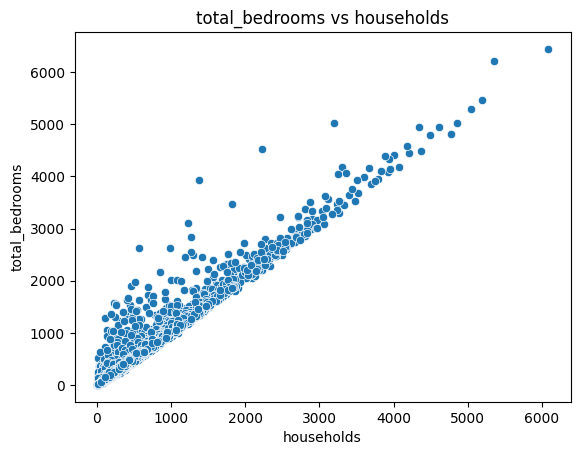

In [22]:
sns.scatterplot(data=df_filtered, x="households", y="total_bedrooms").set(title='total_bedrooms vs households') 

In [23]:
# use linear regression using households to estimate total_bedrooms since they have a very high corrrelation of 0.98
training_df = df_filtered[['total_bedrooms','households']]
training_df = training_df[training_df['total_bedrooms'].isna()==False]
y = training_df['total_bedrooms']
X = training_df['households'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
model.score(X, y)


0.9587225752741039

In [24]:
def predict_total_bdrooms(row):
    if math.isnan(row['total_bedrooms']):
        return round(model.predict([[row['households']]])[0],0)
    else:
        return row['total_bedrooms']


df_filtered['total_bedrooms'] = df_filtered[['total_bedrooms','households']].apply(predict_total_bdrooms, axis=1)

df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19675 non-null  float64
 1   latitude            19675 non-null  float64
 2   housing_median_age  19675 non-null  float64
 3   total_rooms         19675 non-null  float64
 4   total_bedrooms      19675 non-null  float64
 5   population          19675 non-null  float64
 6   households          19675 non-null  float64
 7   median_income       19675 non-null  float64
 8   median_house_value  19675 non-null  float64
 9   ocean_proximity     19675 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1227788970.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_bedrooms'] = df_filtered[['total_bedrooms','households']].apply(predict_total_bdrooms, axis=1)


In [25]:
# Check that total bedrooms not more than total rooms 
df_filtered[df_filtered['total_rooms'] < df_filtered['total_bedrooms']]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

/Users/reginasoh/.pyenv/versions/iod_proj_2/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


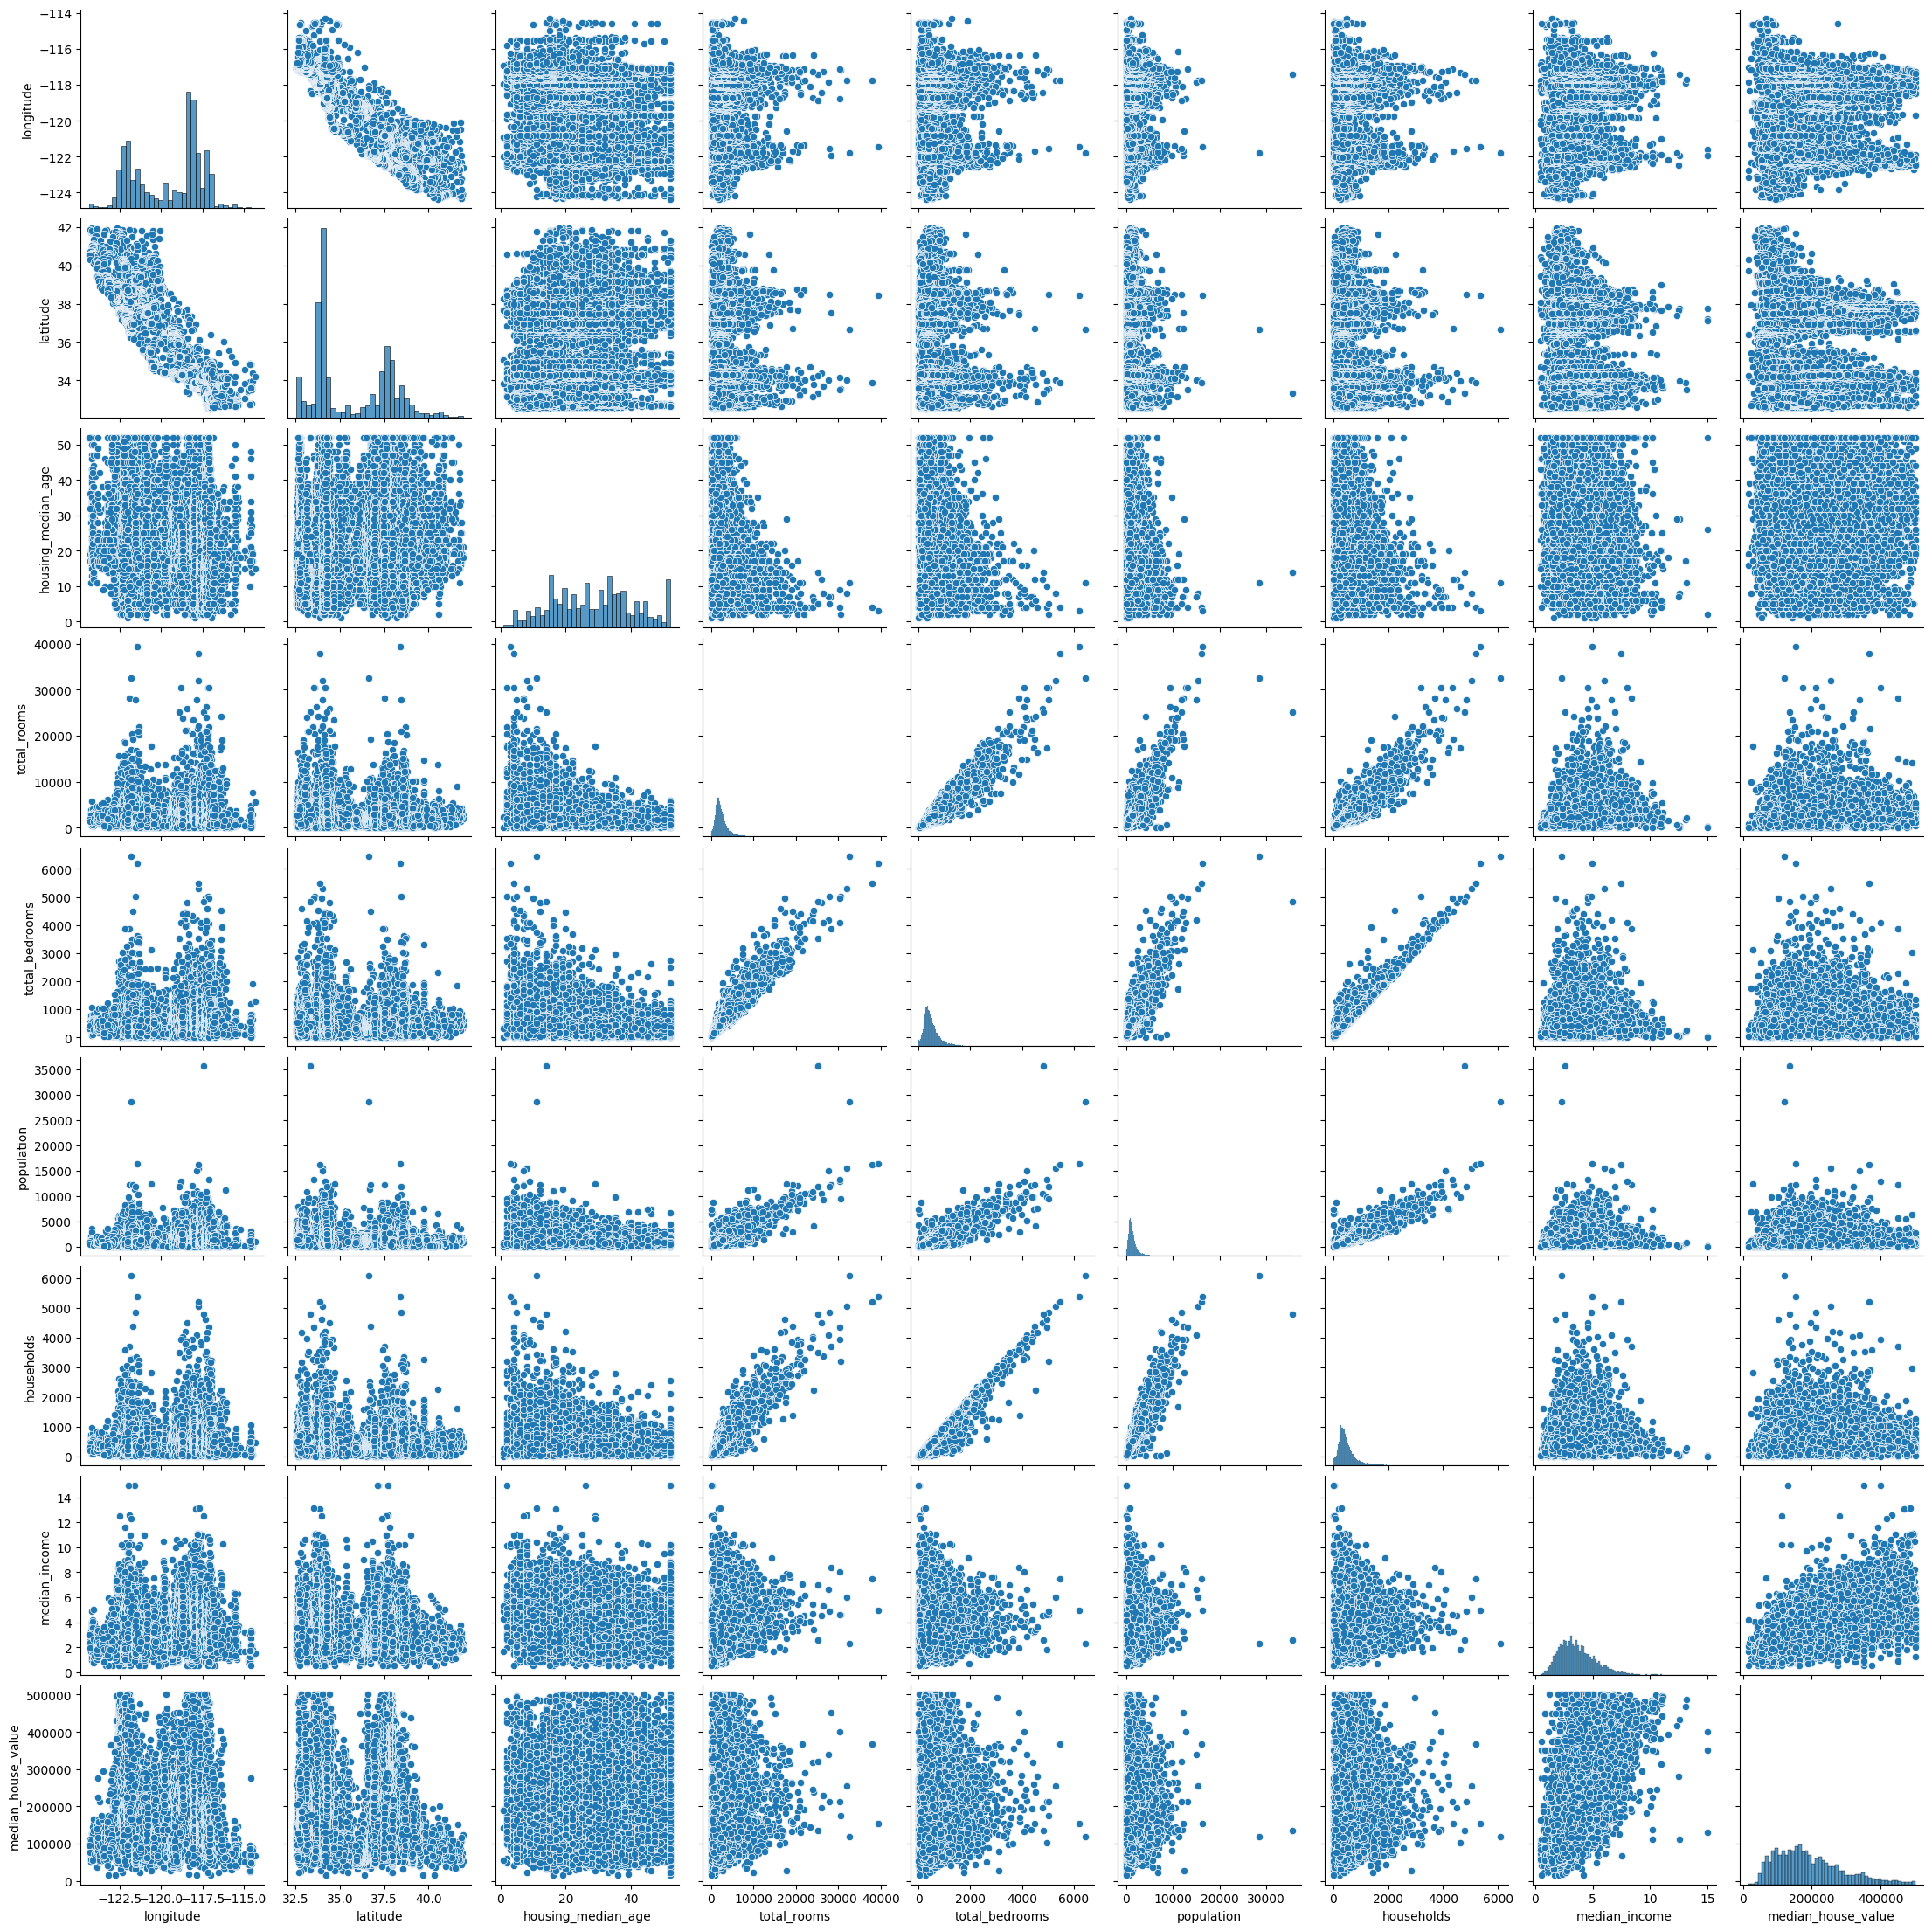

In [26]:
sns.pairplot(df_filtered)

## Preparing data for ML models 

In [27]:
df_filtered.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
corr[(corr>-0.2) & (corr<0.2)]['median_house_value'].sort_values()

population            0.011964
longitude             0.046658
housing_median_age    0.067948
total_bedrooms        0.074672
households            0.094894
total_rooms           0.143139
latitude              0.148289
dtype: float64

In [29]:
# Not considering longitude and latitude as they are not expected to have a linear relationship with price 
# Apply log transformation because price should not be negative and to make y and x have better linear relationship 

X = np.log(df_filtered[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])

X = pd.concat([X, df_filtered['ocean_proximity']], axis=1)

y = np.log(df_filtered['median_house_value'])


/Users/reginasoh/.pyenv/versions/iod_proj_2/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


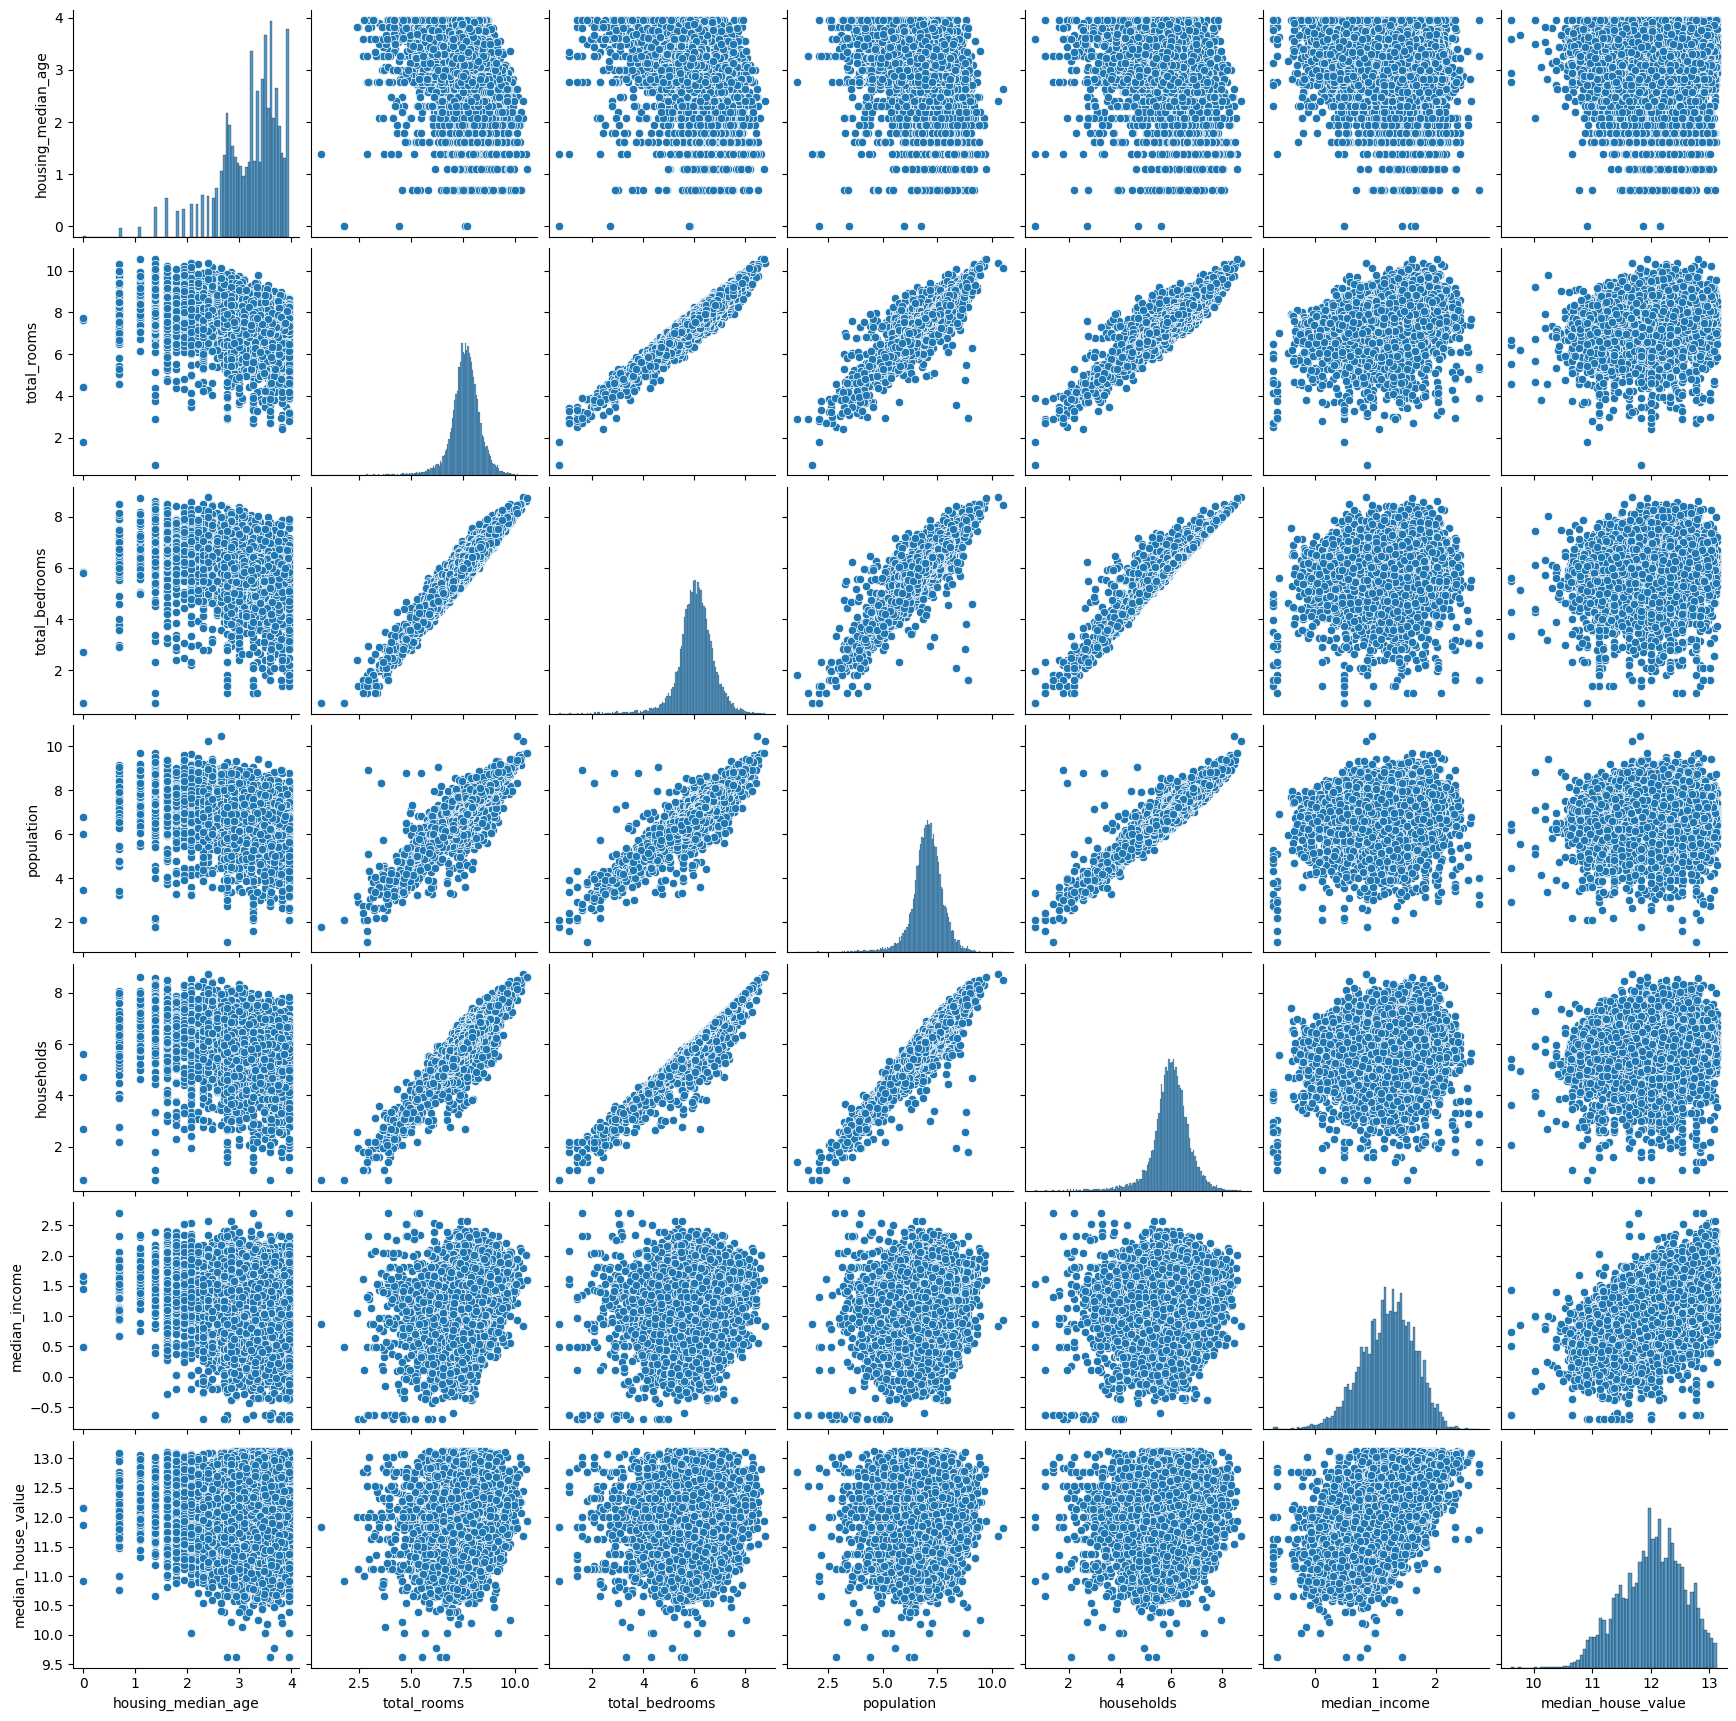

In [30]:
# Check to see if independent variables has a more linear relationship after applying ln 
check_linear = np.log(df_filtered[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']])

sns.pairplot(check_linear)

In [31]:
check_linear.describe()

housing_median_age   total_rooms  total_bedrooms    population  \
count        19675.000000  19675.000000    19675.000000  19675.000000   
mean             3.215994      7.622428        6.055996      7.035870   
std              0.567637      0.749678        0.728749      0.736471   
min              0.000000      0.693147        0.693147      1.098612   
25%              2.890372      7.271009        5.693732      6.679599   
50%              3.332205      7.654917        6.079933      7.072422   
75%              3.610918      8.045588        6.473891      7.465083   
max              3.951244     10.579489        8.771060     10.482402   

         households  median_income  median_house_value  
count  19675.000000   19675.000000        19675.000000  
mean       5.985381       1.209546           12.033999  
std        0.729699       0.441414            0.533308  
min        0.693147      -0.693347            9.615739  
25%        5.641907       0.926954           11.666505  
50%        6.018593       1.238374           12.065660  
75%        6.406880       1.522267           12.421990  
max        8.713089       2.708057           13.122363

In [32]:
X_dummy = pd.get_dummies(data = X, columns = ['ocean_proximity'], drop_first=True, dtype=int )


In [33]:
len(X_dummy.columns)

10

In [34]:
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size = 0.2, random_state=42)

In [35]:
num_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])



In [36]:
X_train.describe()

housing_median_age   total_rooms  total_bedrooms    population  \
count        1.574000e+04  1.574000e+04    1.574000e+04  1.574000e+04   
mean        -4.062824e-17  4.875389e-17   -7.403368e-17  1.194922e-15   
std          1.000032e+00  1.000032e+00    1.000032e+00  1.000032e+00   
min         -5.642394e+00 -9.172893e+00   -7.293996e+00 -8.020901e+00   
25%         -5.709981e-01 -4.618953e-01   -4.929000e-01 -4.753249e-01   
50%          2.042339e-01  4.421797e-02    3.546532e-02  5.196246e-02   
75%          6.932595e-01  5.603649e-01    5.681625e-01  5.797099e-01   
max          1.290389e+00  3.915346e+00    3.692451e+00  4.354278e+00   

         households  median_income  ocean_proximity_INLAND  \
count  1.574000e+04   1.574000e+04            15740.000000   
mean   3.810026e-16  -2.834948e-16                0.331576   
std    1.000032e+00   1.000032e+00                0.470794   
min   -7.201493e+00  -4.311461e+00                0.000000   
25%   -4.722883e-01  -6.380668e-01                0.000000   
50%    4.842918e-02   6.343355e-02                0.000000   
75%    5.734846e-01   7.070813e-01                1.000000   
max    3.711665e+00   3.403512e+00                1.000000   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
count            15740.000000              15740.000000   
mean                 0.000254                  0.108640   
std                  0.015940                  0.311197   
min                  0.000000                  0.000000   
25%                  0.000000                  0.000000   
50%                  0.000000                  0.000000   
75%                  0.000000                  0.000000   
max                  1.000000                  1.000000   

       ocean_proximity_NEAR OCEAN  
count                15740.000000  
mean                     0.123571  
std                      0.329101  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      0.000000  
max                      1.000000

## Linear Regression

In [37]:
X_train_all = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_all)
model_result = model.fit()
model_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2810.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:51:22   Log-Likelihood:                -4325.5
No. Observations:               15740   AIC:                             8673.
Df Residuals:                   15729   BIC:                             8757.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         12.1839      0.004   2988.609      0.000      12.176      12.192
housing_median_age             0.0257      0.003      8.981      0.000       0.020       0.031
total_rooms                   -0.1754      0.013    -13.706      0.000      -0.200      -0.150
total_bedrooms                 0.2266      0.016     14.119      0.000       0.195       0.258
population                    -0.2432      0.007    -33.643      0.000      -0.257      -0.229
households                     0.1989      0.014     13.935      0.000       0.171       0.227
median_income                  0.3347      0.004     81.404      0.000       0.327       0.343
ocean_proximity_INLAND        -0.4536      0.007    -65.815      0.000      -0.467      -0.440
ocean_proximity_ISLAND         0.6935      0.160      4.347      0.000       0.381       1.006
ocean_proximity_NEAR BAY      -0.0107      0.009     -1.209      0.227      -0.028       0.007
ocean_proximity_NEAR OCEAN     0.0072      0.008      0.870      0.384      -0.009       0.023
==============================================================================
Omnibus:                     1211.071   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5308.717
Skew:                           0.260   Prob(JB):                         0.00
Kurtosis:                       5.797   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pickle.dump(model_result, open('linear_regression.pkl', 'wb'))

In [39]:
lr_model = pickle.load(open('linear_regression.pkl', 'rb'))
lr_model.summary()
#lr_model.predict(X_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2810.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:51:22   Log-Likelihood:                -4325.5
No. Observations:               15740   AIC:                             8673.
Df Residuals:                   15729   BIC:                             8757.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         12.1839      0.004   2988.609      0.000      12.176      12.192
housing_median_age             0.0257      0.003      8.981      0.000       0.020       0.031
total_rooms                   -0.1754      0.013    -13.706      0.000      -0.200      -0.150
total_bedrooms                 0.2266      0.016     14.119      0.000       0.195       0.258
population                    -0.2432      0.007    -33.643      0.000      -0.257      -0.229
households                     0.1989      0.014     13.935      0.000       0.171       0.227
median_income                  0.3347      0.004     81.404      0.000       0.327       0.343
ocean_proximity_INLAND        -0.4536      0.007    -65.815      0.000      -0.467      -0.440
ocean_proximity_ISLAND         0.6935      0.160      4.347      0.000       0.381       1.006
ocean_proximity_NEAR BAY      -0.0107      0.009     -1.209      0.227      -0.028       0.007
ocean_proximity_NEAR OCEAN     0.0072      0.008      0.870      0.384      -0.009       0.023
==============================================================================
Omnibus:                     1211.071   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5308.717
Skew:                           0.260   Prob(JB):                         0.00
Kurtosis:                       5.797   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Forward Selection

In [40]:
## Flag intermediate output
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

# start with no predictors
included = []

# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}

# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression

# get the number of cases in the training data
n = X_train.shape[0]
r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X_train.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_test[included + [new_column]], y_test) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1- ((1-r2) * (n-1)/(n-k-1))  # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
        r2_list.append(best['r2'])
        adjusted_r2_list.append(best['a_r2'])
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))




(Step) Excluded = median_income, ocean_proximity_NEAR BAY, total_bedrooms, households, ocean_proximity_NEAR OCEAN, housing_median_age, total_rooms, population, ocean_proximity_ISLAND, ocean_proximity_INLAND
(Step) Trying median_income...
(Step) - Features = median_income
(Step) - Adjusted R^2: This = 0.425; Best = 0.000
(Step) - New Best!   : Feature = median_income; R^2 = 0.425; Adjusted R^2 = 0.425
(Step) Trying ocean_proximity_NEAR BAY...
(Step) - Features = ocean_proximity_NEAR BAY
(Step) - Adjusted R^2: This = 0.026; Best = 0.425
(Step) Trying total_bedrooms...
(Step) - Features = total_bedrooms
(Step) - Adjusted R^2: This = 0.015; Best = 0.425
(Step) Trying households...
(Step) - Features = households
(Step) - Adjusted R^2: This = 0.023; Best = 0.425
(Step) Trying ocean_proximity_NEAR OCEAN...
(Step) - Features = ocean_proximity_NEAR OCEAN
(Step) - Adjusted R^2: This = 0.017; Best = 0.425
(Step) Trying housing_median_age...
(Step) - Features = housing_median_age
(Step) - Adjuste

In [41]:
len(included)

8

In [42]:
included

['median_income',
 'ocean_proximity_INLAND',
 'total_bedrooms',
 'population',
 'households',
 'total_rooms',
 'housing_median_age',
 'ocean_proximity_ISLAND']

In [43]:
X_train_OLS = sm.add_constant(X_train[included])

model = sm.OLS(y_train, X_train_OLS)
model_result = model.fit()
model_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     3512.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        21:51:23   Log-Likelihood:                -4326.9
No. Observations:               15740   AIC:                             8672.
Df Residuals:                   15731   BIC:                             8741.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     12.1836      0.003   3672.019      0.000      12.177      12.190
median_income              0.3346      0.004     81.633      0.000       0.327       0.343
ocean_proximity_INLAND    -0.4535      0.006    -70.451      0.000      -0.466      -0.441
total_bedrooms             0.2274      0.016     14.186      0.000       0.196       0.259
population                -0.2425      0.007    -34.172      0.000      -0.256      -0.229
households                 0.1981      0.014     13.923      0.000       0.170       0.226
total_rooms               -0.1762      0.013    -13.806      0.000      -0.201      -0.151
housing_median_age         0.0251      0.003      8.856      0.000       0.020       0.031
ocean_proximity_ISLAND     0.6943      0.160      4.353      0.000       0.382       1.007
==============================================================================
Omnibus:                     1206.782   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5276.173
Skew:                           0.259   Prob(JB):                         0.00
Kurtosis:                       5.789   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# linear regression with forward selection
model = LinearRegression() 
model.fit(X_train, y_train)
print('Training Score:',model.score(X_train, y_train))
print('Test Score:',model.score(X_test, y_test))


Training Score: 0.6411135580073457
Test Score: 0.6528862321315593


/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/3091960740.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/3091960740.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


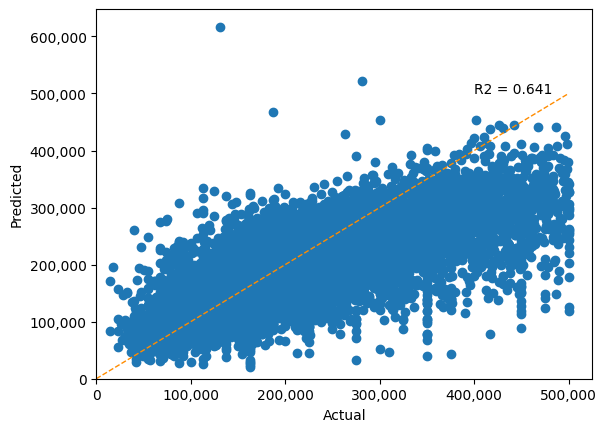

In [45]:
# Plot predicted vs actual values for training
y_pred_train = model.predict(X_train)

plt.scatter(np.exp(y_train),np.exp(y_pred_train))
plt.plot([0, 500000], [0, 500000], color = 'darkorange', lw = 1, linestyle = '--');
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


plt.annotate('R2 = %0.3f' % model.score(X_train, y_train),(400000, 500000) )
plt.show()

/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1633054328.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1633054328.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


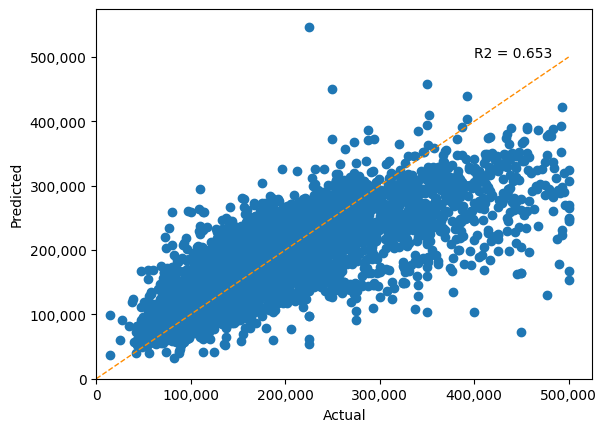

In [46]:
# Plot predicted vs actual values for testing
y_pred = model.predict(X_test)
plt.scatter(np.exp(y_test),np.exp(y_pred))
plt.plot([0, 500000], [0, 500000], color = 'darkorange', lw = 1, linestyle = '--');
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


plt.annotate('R2 = %0.3f' % model.score(X_test, y_test),(400000, 500000) )
plt.show()

In [47]:
# Store scores
training_scores = {}
testing_scores = {}

lr_train_r2 = model.score(X_train, y_train)
lr_test_r2 = model.score(X_test, y_test)

lr_train_mse = mean_squared_error(y_train, y_pred_train)
lr_test_mse = mean_squared_error(y_test, y_pred)

training_scores['lr'] = {'r2': lr_train_r2, 'mse': lr_train_mse}
testing_scores['lr'] = {'r2': lr_test_r2, 'mse': lr_test_mse}

### Linear Regression assumptions check

In [48]:
# Mean of residue
y_pred = model.predict(X_train)
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -7.544438037732321e-16


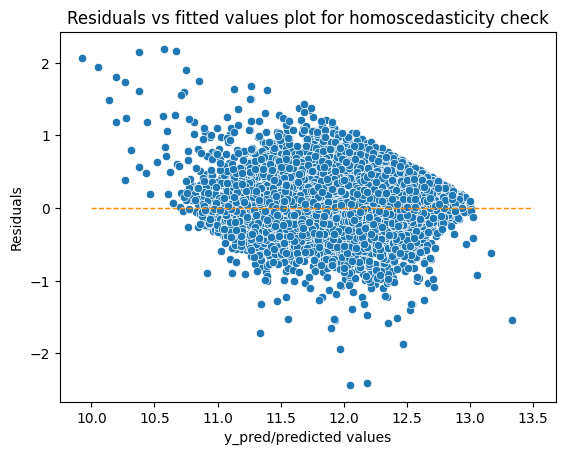

In [49]:
# Detecting heteroscedasticity
p = sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.plot([10, 13.5], [0, 0], color = 'darkorange', lw = 1, linestyle = '--');

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [50]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9904906767875576), ('p-value', 0.6640475492158506)]

/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/4195981251.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


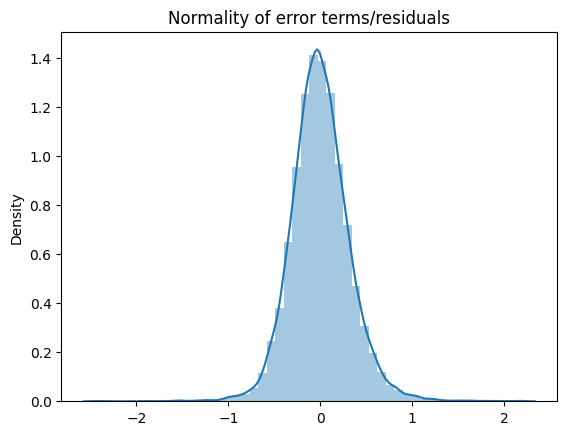

In [51]:
# Normality of error terms
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [52]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
 
name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
 
#run the Jarque-Bera test for Normality on the residuals vector
test = sms.jarque_bera(residuals)
 
#print out the test results. This will also print the Skewness and Kurtosis of the resid vector
lzip(name, test)

[('Jarque-Bera test', 5308.716564175742),
 ('Chi-squared(2) p-value', 0.0),
 ('Skewness', 0.25964293189077625),
 ('Kurtosis', 5.797312011154901)]

## Lasso Regression

In [53]:
# Find Optimal Lasso Using LassoCV 
alphas = np.logspace(-6, 6, 500)

optimal_lasso = LassoCV(cv=10, alphas=alphas)
optimal_lasso.fit(X_train, y_train)
print('Alpha:', optimal_lasso.alpha_)
print('Coefficients: ', optimal_lasso.coef_)
print('Training Score:', optimal_lasso.score(X_train, y_train))
print('Test Score:', optimal_lasso.score(X_test, y_test))


Alpha: 1e-06
Coefficients:  [ 0.02569877 -0.17536975  0.22653398 -0.24323619  0.19888512  0.33468019
 -0.45364053  0.68955721 -0.01068474  0.00718823]
Training Score: 0.6411135436394152
Test Score: 0.6528868329844766


/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1618857792.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1618857792.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


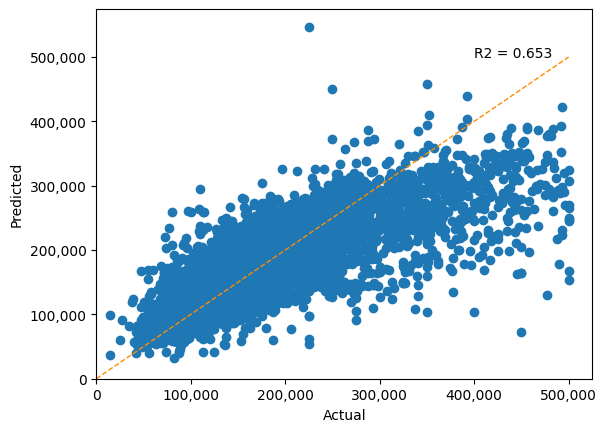

In [54]:
# lasso
y_pred = optimal_lasso.predict(X_test)

plt.scatter(np.exp(y_test),np.exp(y_pred))
plt.plot([0, 500000], [0, 500000], color = 'darkorange', lw = 1, linestyle = '--');
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.annotate('R2 = %0.3f' % optimal_lasso.score(X_test, y_test),(400000, 500000) )
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

plt.show()

In [55]:
lasso_train_r2 = optimal_lasso.score(X_train, y_train)
lasso_test_r2 = optimal_lasso.score(X_test, y_test)

y_pred_train = optimal_lasso.predict(X_train)

lasso_train_mse = mean_squared_error(y_train, y_pred_train)
lasso_test_mse = mean_squared_error(y_test, y_pred)

training_scores['lasso'] = {'r2': lasso_train_r2, 'mse': lasso_train_mse}
testing_scores['lasso'] = {'r2': lasso_test_r2, 'mse': lasso_test_mse}

## Ridge Regression

In [56]:
# Find optimal Ridge using RidgeCV
optimal_ridge = RidgeCV(cv=10, alphas=alphas)
optimal_ridge.fit(X_train, y_train)
print('Alpha:', optimal_ridge.alpha_)
print('Training Score:', optimal_ridge.score(X_train, y_train))
print('Test Score:', optimal_ridge.score(X_test, y_test))


Alpha: 1e-06
Training Score: 0.6411135580073457
Test Score: 0.6528862321927164


/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1044809634.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
/var/folders/6g/2gnf02z56_3fdvcj9dlyc0gc0000gn/T/ipykernel_3705/1044809634.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])


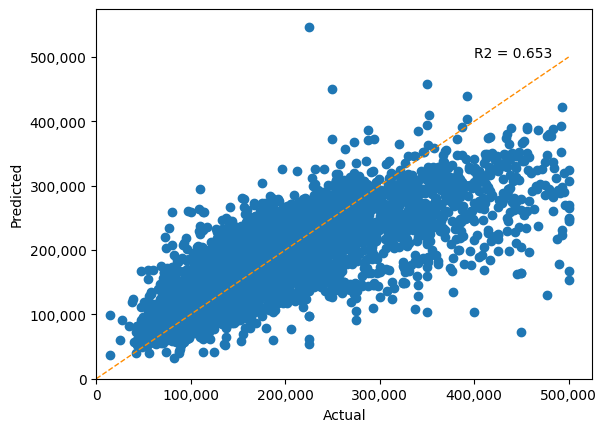

In [57]:
# ridge
y_pred = optimal_ridge.predict(X_test)

plt.scatter(np.exp(y_test),np.exp(y_pred))
plt.plot([0, 500000], [0, 500000], color = 'darkorange', lw = 1, linestyle = '--');
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.annotate('R2 = %0.3f' % optimal_ridge.score(X_test, y_test),(400000, 500000) )
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

plt.show()

In [58]:
ridge_train_r2 = optimal_ridge.score(X_train, y_train)
ridge_test_r2 = optimal_ridge.score(X_test, y_test)

y_pred_train = optimal_ridge.predict(X_train)

ridge_train_mse = mean_squared_error(y_train, y_pred_train)
ridge_test_mse = mean_squared_error(y_test, y_pred)

training_scores['ridge'] = {'r2': ridge_train_r2, 'mse': ridge_train_mse}
testing_scores['ridge'] = {'r2': ridge_test_r2, 'mse': ridge_test_mse}

## Comparing different models

In [59]:
training_score_df = pd.DataFrame.from_dict(training_scores, orient='index')
training_score_df

r2       mse
lr     0.641114  0.101443
lasso  0.641114  0.101443
ridge  0.641114  0.101443

In [60]:
testing_score_df = pd.DataFrame.from_dict(testing_scores, orient='index')
testing_score_df

r2       mse
lr     0.652886  0.101138
lasso  0.652887  0.101138
ridge  0.652886  0.101138